En este análisis, nos centramos en la migración global y las experiencias de las personas que fallecieron, sobrevivieron o desaparecieron en el intento de buscar una vida mejor. Estos datos nos revelan la cruda realidad y los desafíos enfrentados por aquellos que abandonan sus hogares en busca de oportunidades y seguridad en otras partes del mundo. La migración global es un fenómeno complejo que involucra sacrificios, esperanzas y desafíos para quienes deciden embarcarse en esta travesía.

Al analizar estas cifras, buscamos identificar patrones y tendencias que arrojen luz sobre las causas subyacentes de la migración, los riesgos enfrentados por los migrantes en su viaje y las posibles áreas de intervención para abordar este complejo problema a nivel global. A través del análisis exploratorio de datos, no solo buscamos comprender mejor la situación actual, sino también generar información que pueda alimentar futuros modelos de aprendizaje automático.

El objetivo final es utilizar estos datos y análisis para desarrollar modelos predictivos y herramientas de apoyo decisional basadas en el aprendizaje automático. Estas herramientas podrían ayudar a predecir tendencias futuras de migración, identificar poblaciones vulnerables y diseñar intervenciones efectivas para proteger los derechos y la seguridad de los migrantes en el contexto de la migración global.

In [3]:
# Para iniciar el projeto, vamos importar as bibliotecas que vamos utilizar
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import warnings
from shapely.geometry import Point



In [4]:
# Vamos a leer el arquivo csv que vamos utilizar
migracion_datos = pandas.read_csv('MissingMigrants-Global-2024-02-13--14_07_45.csv')
migracion_datos.head()

,Main ID,Incident ID,Region,Incident Date,Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,...,Region of Origin,Cause of Death,Country of Origin,Location of death,Information Source,Coordinates,Migration route,URL,UNSD Geographical Grouping,Source Quality
0,2023.MMP0001,2023.MMP00012,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,NaN,1.0,1,NaN,...,Caribbean,Drowning,Haiti,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,NaN,Uncategorized,4
1,2023.MMP0001,2023.MMP00013,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,NaN,1.0,1,NaN,...,Middle Africa,Drowning,Democratic Republic of the Congo,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,NaN,Uncategorized,4
2,2023.MMP0001,2023.MMP00014,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,NaN,1.0,1,NaN,...,Western Africa,Drowning,Mali,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,NaN,Uncategorized,4
3,2023.MMP0001,2023.MMP00015,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,NaN,2.0,2,38.0,...,Western Asia (P),Drowning,Unknown,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,NaN,Uncategorized,4
4,2023.MMP0002,2023.MMP0002,Europe,"Sun, 01/01/2023 - 12:00",2023,January,1.0,NaN,1,15.0,...,Unknown,Vehicle accident / death linked to hazardous t...,Unknown,Egnatia Highway between Alexandroupolis and Ko...,"Ekathimerini, Amna Greece, Infomigrants","40.95496299, 25.65250242",NaN,"https://archive.ph/IBpVf, https://archive.ph/a...",Southern Europe,3


In [5]:
# Voy a contar cuantos valores NaN hay en cada columna
nan_count = migracion_datos.isna().sum()

# Imprime el número total de valores NaN
print(nan_count)

Main ID                                   0
Incident ID                               0
Region                                    0
Incident Date                             0
Year                                      0
Reported Month                            0
Number Dead                             146
Minimum Estimated Number of Missing    1266
Total Number of Dead and Missing          0
Number of Survivors                    1075
Number of Females                      1214
Number of Males                         640
Number of Children                     1330
Region of Origin                          0
Cause of Death                            0
Country of Origin                         0
Location of death                         0
Information Source                        2
Coordinates                               0
Migration route                         256
URL                                     519
UNSD Geographical Grouping                0
Source Quality                  

In [6]:
# Reemplazó los valores NaN con un valor numérico
df_sin_nulos = migracion_datos.fillna(value=0)

# Y los imprimo para verificar que se hayan reemplazado
df_sin_nulos

,Main ID,Incident ID,Region,Incident Date,Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,...,Region of Origin,Cause of Death,Country of Origin,Location of death,Information Source,Coordinates,Migration route,URL,UNSD Geographical Grouping,Source Quality
0,2023.MMP0001,2023.MMP00012,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,0.0,1.0,1,0.0,...,Caribbean,Drowning,Haiti,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,0,Uncategorized,4
1,2023.MMP0001,2023.MMP00013,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,0.0,1.0,1,0.0,...,Middle Africa,Drowning,Democratic Republic of the Congo,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,0,Uncategorized,4
2,2023.MMP0001,2023.MMP00014,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,0.0,1.0,1,0.0,...,Western Africa,Drowning,Mali,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,0,Uncategorized,4
3,2023.MMP0001,2023.MMP00015,Mediterranean,"Mon, 01/02/2023 - 12:00",2023,January,0.0,2.0,2,38.0,...,Western Asia (P),Drowning,Unknown,During pushback at unidentified location near ...,IOM Türkiye,"37.69253013, 26.99162098",Eastern Mediterranean,0,Uncategorized,4
4,2023.MMP0002,2023.MMP0002,Europe,"Sun, 01/01/2023 - 12:00",2023,January,1.0,0.0,1,15.0,...,Unknown,Vehicle accident / death linked to hazardous t...,Unknown,Egnatia Highway between Alexandroupolis and Ko...,"Ekathimerini, Amna Greece, Infomigrants","40.95496299, 25.65250242",0,"https://archive.ph/IBpVf, https://archive.ph/a...",Southern Europe,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2023.MMP1438,2023.MMP1438,Central America,"Fri, 03/24/2023 - 12:00",2023,March,1.0,0.0,1,0.0,...,Latin America / Caribbean (P),Drowning,Unknown,"Bravo River in Piedras Negras, Coahuila,Mexico",Grupos Beta,"28.69413805, -100.5109277",US-Mexico border crossing,0,Central America,5
1495,2023.MMP1439,2023.MMP1439,Central America,"Sat, 03/25/2023 - 12:00",2023,March,1.0,0.0,1,0.0,...,Central America,Drowning,Mexico,"Mountainous desertic area in Tecate, Baja Cali...",Grupos Beta,"32.57812141, -116.6019047",US-Mexico border crossing,0,Central America,5
1496,2023.MMP1440,2023.MMP1440,Central America,"Tue, 04/04/2023 - 12:00",2023,April,1.0,0.0,1,0.0,...,Latin America / Caribbean (P),Drowning,Unknown,"Bravo River in Piedras Negras, Coahuila,Mexico",Grupos Beta,"28.69348259, -100.5109985",US-Mexico border crossing,0,Central America,5
1497,2023.MMP1441,2023.MMP1441,Central America,"Sat, 04/08/2023 - 12:00",2023,April,1.0,0.0,1,0.0,...,Latin America / Caribbean (P),Drowning,Unknown,"Bravo River in Piedras Negras, Coahuila,Mexico",Grupos Beta,"28.69312966, -100.5108751",US-Mexico border crossing,0,Central America,5


In [7]:
df_sin_nulos.info() #hago un resumen de la información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              1499 non-null   object 
 1   Incident ID                          1499 non-null   object 
 2   Region                               1499 non-null   object 
 3   Incident Date                        1499 non-null   object 
 4   Year                                 1499 non-null   int64  
 5   Reported Month                       1499 non-null   object 
 6   Number Dead                          1499 non-null   float64
 7   Minimum Estimated Number of Missing  1499 non-null   float64
 8   Total Number of Dead and Missing     1499 non-null   int64  
 9   Number of Survivors                  1499 non-null   float64
 10  Number of Females                    1499 non-null   float64
 11  Number of Males               

In [8]:
# Voy hacer un cambio en el tipo de dato de las columnas y los pasare a enteros
df_sin_nulos['Number of Females'] = df_sin_nulos['Number of Females'].astype(int)
df_sin_nulos['Number of Children'] = df_sin_nulos['Number of Children'].astype(int)
df_sin_nulos['Number of Males'] = df_sin_nulos['Number of Males'].astype(int)

# Acá voy a sumar los valores de las columnas para obtener el total de mujeres, niños y hombres
total_mujeres = df_sin_nulos['Number of Females'].sum()
total_niños = df_sin_nulos['Number of Children'].sum()
total_hombres = df_sin_nulos['Number of Males'].sum()

# Imprimir 
print(total_mujeres)
print(total_niños)
print(total_hombres)

732
297
1822


In [9]:
# Este fragmento encontrara el mes con la mayor migración
df_sin_nulos['Year'].mode()
df_sin_nulos['Reported Month'].value_counts()

Reported Month
July         182
August       171
April        143
February     133
March        132
September    129
January      122
May          118
October      108
June         106
November     101
December      54
Name: count, dtype: int64

Hare una visualización de la ubicación con mayor y menor de  incidentes que han ocurrido en el año 2023.

La ubicación con el mayor número de incidentes es: Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)


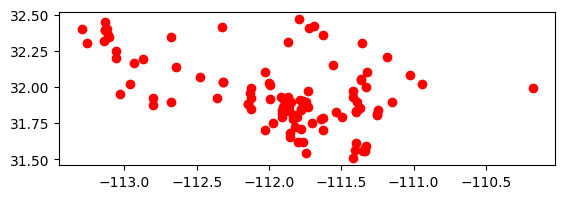

In [18]:
# Voy a dividir la columna 'Coordinates' en dos columnas 'lat' y 'lon' para que sea una forma más fácil de trabajar con ellas
df_sin_nulos[['lat', 'lon']] = df_sin_nulos['Coordinates'].str.split(',', expand=True)

# Transformare las columnas 'lat' y 'lon' a float
df_sin_nulos[['lat', 'lon']] = df_sin_nulos[['lat', 'lon']].astype(float)

# Creó una columna 'geometry' con objetos Point a partir de las columnas 'lat' y 'lon'
# con el fin de poder crear un GeoDataFrame
df_sin_nulos['geometry'] = df_sin_nulos.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Creó el GeoDataFrame a partir de df_sin_nulos
geo_df = gpd.GeoDataFrame(df_sin_nulos, geometry='geometry')

# Encuentró la ubicación con el mayor número de incidentes
location_max_incidents = df_sin_nulos['Location of death'].value_counts().idxmax()

# Se filtran los datos para obtener solo los incidentes en la ubicación con el mayor número de incidentes
geo_df_max_location = geo_df[geo_df['Location of death'] == location_max_incidents]

# Ahora df_max_location contiene solo los incidentes en la ubicación con el mayor número de incidentes
print(f"La ubicación con el mayor número de incidentes es: {location_max_incidents}")

# Plot the GeoDataFrame
geo_df_max_location.plot(color='red')

# Show the plot
plt.show()

- El análisis revela que el año 2023 registró el mayor número de incidentes en el estado de Arizona, Estados Unidos. Este fenómeno puede atribuirse, en parte, al hecho de que numerosos migrantes ven en Estados Unidos la materialización de sus aspiraciones de vida, lo que puede resultar en un aumento de la actividad y los incidentes en áreas de alto tránsito migratorio como Arizona.

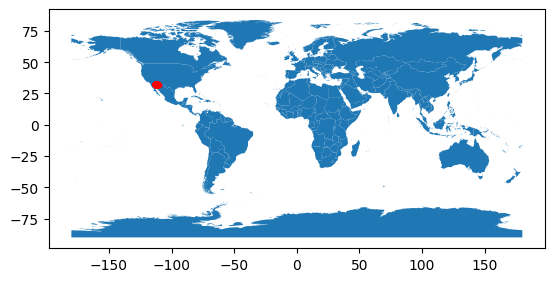

In [19]:
# Ruta del archivo shapefile
ruta_archivo = "Natural_Earth_quick_start/10m_cultural/ne_10m_admin_0_countries.shx"

# Leer el shapefile
geo_dataframe = gpd.read_file(ruta_archivo)

# Crea el objeto de los ejes para el mapa base
fig, ax = plt.subplots()

# Visualizar el mapa
geo_dataframe.plot(ax=ax)

# Divide la columna 'Coordinates' en dos columnas 'lat' y 'lon' como lo hicimos antes
df_sin_nulos[['lat', 'lon']] = df_sin_nulos['Coordinates'].str.split(',', expand=True)

# Convierte las columnas 'lat' y 'lon' a float
df_sin_nulos[['lat', 'lon']] = df_sin_nulos[['lat', 'lon']].astype(float)

# Crea una columna 'geometry' con objetos Point a partir de las columnas 'lat' y 'lon'
df_sin_nulos['geometry'] = df_sin_nulos.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# GeoDataFrame a partir de df_sin_nulos
geo_df = gpd.GeoDataFrame(df_sin_nulos, geometry='geometry')

# Encuentra la ubicación con el mayor número de incidentes
location_max_incidents = df_sin_nulos['Location of death'].value_counts().idxmax()

# Acá los datos filtrados para obtener solo los incidentes en la ubicación con el mayor número de incidentes
geo_df_max_location = geo_df[geo_df['Location of death'] == location_max_incidents]

# Trazar los puntos de los incidentes en el mapa base
geo_df_max_location.plot(ax=ax, color='red', markersize=10)

# Mostrar el gráfico
plt.show()

La visualización revela que durante el año 2023, se registraron un menor número de incidentes en la isla de Lanzarote, España. Este fenómeno es notable dada la conocida ruta migratoria que parte desde las costas marroquíes con destino a las islas de Lanzarote y otras del archipiélago canario. La baja incidencia de incidentes en esta región puede atribuirse a una variedad de factores, como la efectividad de las medidas de seguridad y control fronterizo implementadas por las autoridades españolas y europeas, así como también a la situación geopolítica y las condiciones climáticas que pueden influir en los patrones migratorios.

La ubicación con el menor número de incidentes es: Around 78km east of Lazarote, Spain - embarkation from Tan Tan, Morocco


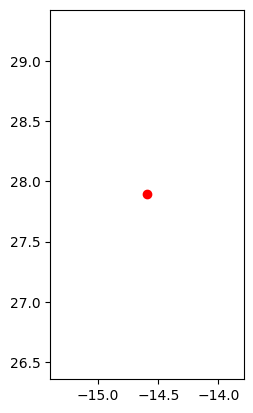

In [22]:
# Dividir la columna 'Coordinates' en dos columnas 'lat' y 'lon'
df_sin_nulos[['lat', 'lon']] = df_sin_nulos['Coordinates'].str.split(',', expand=True)

# Conviertó las columnas 'lat' y 'lon' a float
df_sin_nulos[['lat', 'lon']] = df_sin_nulos[['lat', 'lon']].astype(float)

# Creó una columna 'geometry' con objetos Point a partir de las columnas 'lat' y 'lon'
df_sin_nulos['geometry'] = df_sin_nulos.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# GeoDataFrame a partir de df_sin_nulos
geo_df = gpd.GeoDataFrame(df_sin_nulos, geometry='geometry')


# Encuentró la ubicación con el menor número de incidentes
location_min_incidents = df_sin_nulos['Location of death'].value_counts().idxmin()

# Filtra los datos para obtener solo los incidentes en la ubicación con el menor número de incidentes
geo_df_min_location = geo_df[geo_df['Location of death'] == location_min_incidents]

location_min_incidents = df_sin_nulos['Location of death'].value_counts().idxmin()
# Filtra los datos para obtener solo los incidentes en la ubicación con el menor número de incidentes
df_min_location = df_sin_nulos[df_sin_nulos['Location of death'] == location_min_incidents]

# Ahora df_min_location contiene solo los incidentes en la ubicación con el menor número de incidentes
print(f"La ubicación con el menor número de incidentes es: {location_min_incidents}")

# Plot the GeoDataFrame
geo_df_min_location.plot(color='red')

# Show the plot
plt.show()

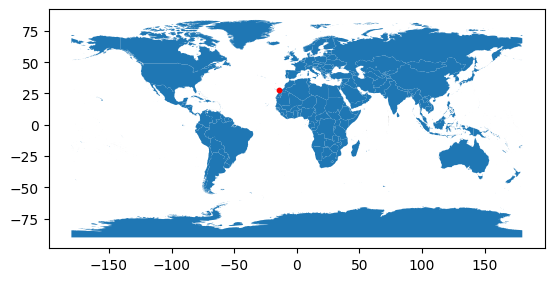

In [21]:
# Ruta del archivo shapefile
ruta_archivo = "Natural_Earth_quick_start/10m_cultural/ne_10m_admin_0_countries.shp"

# Leer el shapefile
geo_dataframe = gpd.read_file(ruta_archivo)

# Nuevamente crea el objeto de los ejes para el mapa base
fig, ax = plt.subplots()

# Visualizar
geo_dataframe.plot(ax=ax)

# Dividir la columna
df_sin_nulos[['lat', 'lon']] = df_sin_nulos['Coordinates'].str.split(',', expand=True)

# Conviertó las columnas 'lat' y 'lon' a float
df_sin_nulos[['lat', 'lon']] = df_sin_nulos[['lat', 'lon']].astype(float)

# Creó una columna 'geometry' con objetos Point a partir de las columnas 'lat' y 'lon'
df_sin_nulos['geometry'] = df_sin_nulos.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Creó un GeoDataFrame a partir de df_sin_nulos
geo_df = gpd.GeoDataFrame(df_sin_nulos, geometry='geometry')

# Encuentró la ubicación con el menor número de incidentes
location_min_incidents = df_sin_nulos['Location of death'].value_counts().idxmin()

# Filtró los datos para obtener solo los incidentes en la ubicación con el menor número de incidentes
geo_df_min_location = geo_df[geo_df['Location of death'] == location_min_incidents]

# Trazar los puntos de los incidentes en el mapa base
geo_df_min_location.plot(ax=ax, color='red', markersize=10)

# Mostrar el gráfico
plt.show()

In [14]:
df_sin_nulos.describe() # hago un describe para ver las estadísticas de las columnas numéricas

,Year,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality,lat,lon
count,1499.0,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,2023.0,2.528352,2.072715,4.601067,8.947298,0.488326,1.215477,0.198132,3.540360,28.111351,-30.150323
std,0.0,7.754733,15.495662,19.057208,40.724864,4.604849,3.718158,0.842050,1.294001,11.335044,61.976298
min,2023.0,0.000000,-3.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,-37.017912,-119.432156
25%,2023.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,21.945856,-100.506133
50%,2023.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,31.361480,0.019509
75%,2023.0,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,5.000000,34.517033,16.920575
max,2023.0,227.000000,510.000000,596.000000,1100.000000,168.000000,63.000000,16.000000,5.000000,56.090999,129.225227


En esta sección, se presentarán tres histogramas que ilustran la frecuencia de personas fallecidas, desaparecidas y sobrevivientes entre los migrantes durante el transcurso del año 2023. Estas visualizaciones ofrecen una representación gráfica clara de la distribución de estos eventos a lo largo del periodo analizado, permitiendo una mejor comprensión de la magnitud y la evolución de los incidentes relacionados con la migración durante dicho año.

Interpretación:

1- El primer histograma indica que la mayoría de los valores de la variable "Número de Fallecidos" se encuentran alrededor de 50.
Sin embargo, hay una gran variabilidad en la cantidad de fallecidos, con algunos valores muy por encima y por debajo de la media.<br>

2- El segundo histograma indica que el número máximo de sobrevivientes es mayor cuando la frecuencia es baja.<br>
Esto significa que es más probable que sobrevivan más personas si el evento que los amenaza es poco común.<br>
A medida que aumenta la frecuencia del evento, el número máximo de sobrevivientes disminuye rápidamente.
Esto significa que es menos probable que sobrevivan muchas personas si el evento que los amenaza es común. <br>

3- El histograma indica que el número de desaparecidos ha ido aumentando a lo largo del tiempo.<br>
El año 2015 presenta un pico en el número de desaparecidos, lo que podría ser debido a un evento específico. <br>
O podria ser outliers en los datos.

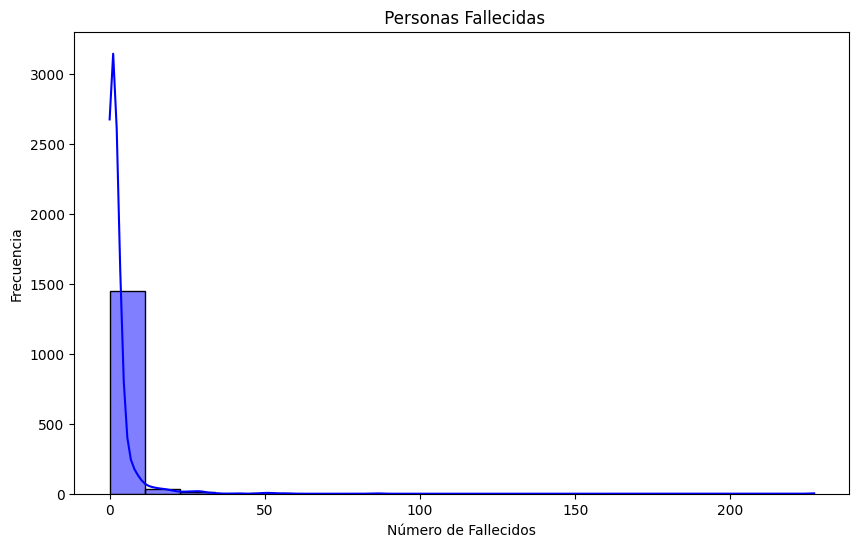

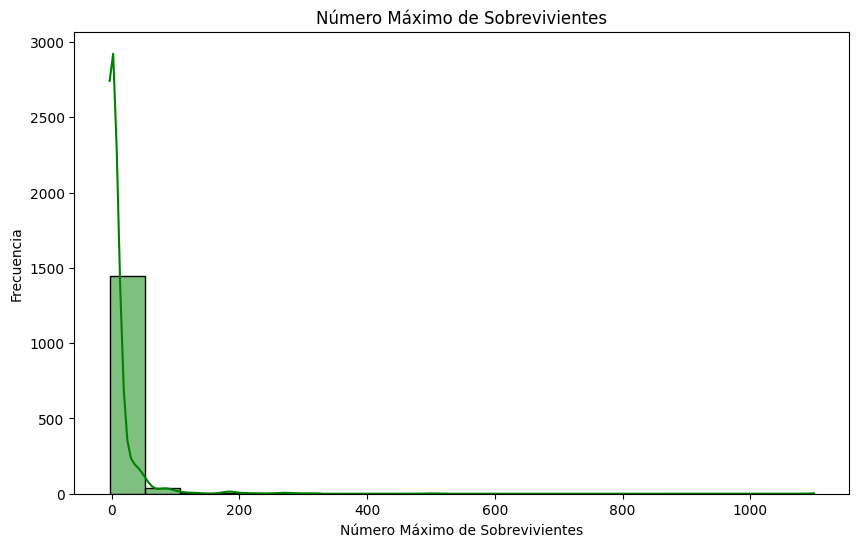

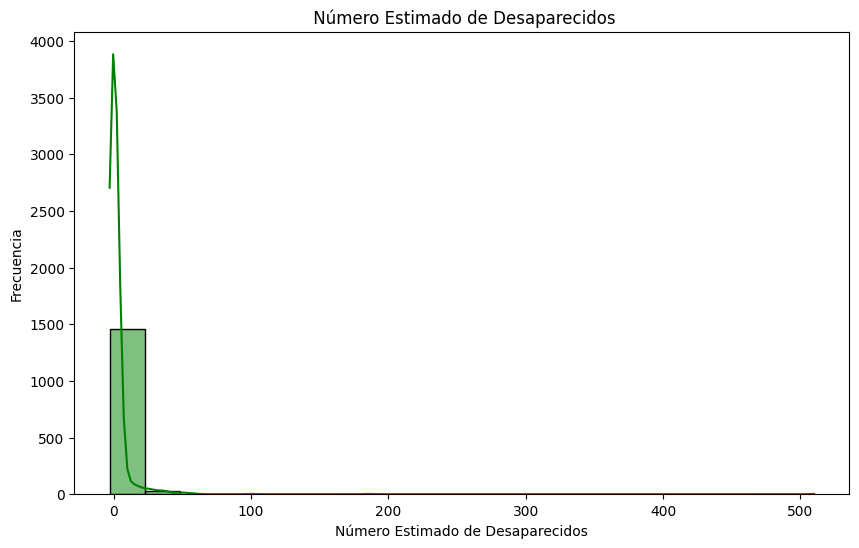

In [15]:
# Histograma de personas fallecidas
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_nulos['Number Dead'], bins=20, color='blue', kde=True)
plt.title(' Personas Fallecidas')
plt.xlabel('Número de Fallecidos')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del número máximo de sobrevivientes
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_nulos['Number of Survivors'], bins=20, color='green', kde=True)
plt.title('Número Máximo de Sobrevivientes')
plt.xlabel('Número Máximo de Sobrevivientes')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de rango de edades
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_nulos['Minimum Estimated Number of Missing'], bins=20, color='green', kde=True)
plt.title(' Número Estimado de Desaparecidos')
plt.xlabel('Número Estimado de Desaparecidos')
plt.ylabel('Frecuencia')
plt.show()

-----------------------------------------------------------------------------------------------------------------------

El mapa de calor indica que hay una correlación positiva entre el número de muertos y el número de sobrevivientes.<br>
Esto significa que, en general, a medida que aumenta el número de muertos, también aumenta el número de sobrevivientes.Las áreas con mayor correlación positiva se encuentran en la parte superior izquierda y en la parte inferior derecha del mapa de calor.<br>
Las áreas con menor correlación positiva se encuentran en la parte superior derecha y en la parte inferior izquierda del mapa de calor.

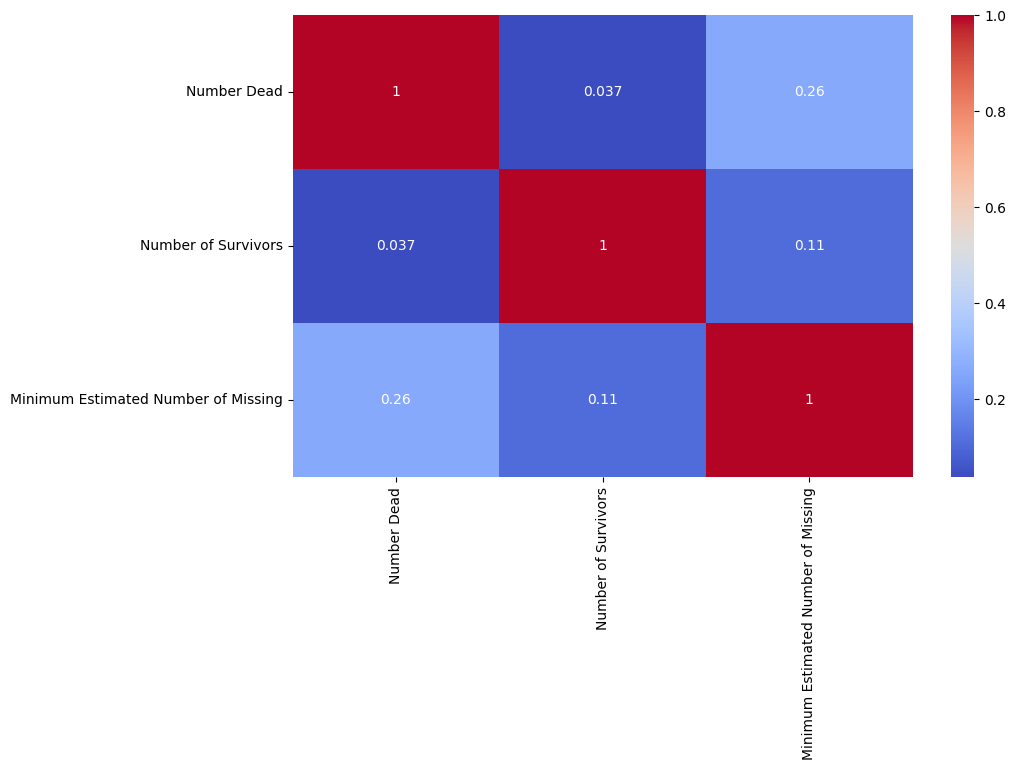

In [16]:
# Calcular la matriz de correlación
corr_matrix = df_sin_nulos[['Number Dead', 'Number of Survivors', 'Minimum Estimated Number of Missing']].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

In [17]:
# hago un nuevo archivo csv con los datos sin valores nulos
df_sin_nulos.to_csv('migracion_datos_2023.csv', index=False)